In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import json

sns.set(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
#plt = sns.lineplot(x="timepoint", y="signal",
#             hue="region", style="event",
#             data=fmri)


#plt.show()

In [2]:

with open('../1_pop_cleaning/communes_VD_clean.json', 'r') as cf:
    communes = json.load(cf)
    for c in communes:
        for hy in c["hab_year"]:
            hy["pop"] = int(hy["pop"])
            hy["year"] = int(hy["year"])
cdata = pd.DataFrame(communes)
cdata

,actionsDone,actionsUndone,gravity,hab_year,name,problem_start,problem_time,problem_unit,text,url
0,"[{'action': 'deleted', 'data': {'year': '1990'...",[],3,"[{'year': 1764, 'pop': 917, 'unit': ' Einw', '...","Abbaye, L'",1270,1,1,"\n\nPolit. Gem. VD, seit 1798 Bez. La Vallée. ...",/Articles/002609/?language=de
1,[],[],0,"[{'year': 1699, 'pop': 180, 'unit': ' Einw', '...","Abergement, L'",False,0,0,"\n\nPolit. Gem. VD, Bez. Orbe, mit dem Strasse...",/Articles/002525/?language=de
2,[],[],0,"[{'year': 1416, 'pop': 28, 'unit': ' Haushalte...",Aclens,False,0,0,"\n\nPolit. Gem. VD, seit 1798 Bez. Morges, auf...",/Articles/002427/?language=de
3,"[{'action': 'deleted', 'data': {'year': '1888'...",[],3,"[{'year': 1529, 'pop': 19, 'unit': ' Haushalte...",Agiez,1054,1,1,"\n\nPolit. Gem. VD, Bez. Orbe seit 1798. Dorf ...",/Articles/002526/?language=de
4,"[{'action': 'deleted', 'data': {'year': '2000'...",[],1,"[{'year': 1764, 'pop': 1431, 'unit': ' Einw', ...",Aigle (Gemeinde),False,0,1,"\n\nPolit. Gem. VD, Hauptort des Bez. A., an d...",/Articles/002276/?language=de
5,[],[],0,"[{'year': 1764, 'pop': 119, 'unit': ' Einw', '...",Allaman,False,0,0,"\n\nPolit. Gem. VD, Bez. Rolle, am Genfersee r...",/Articles/002596/?language=de
6,[],[],0,"[{'year': 1416, 'pop': 24, 'unit': ' Haushalte...",Apples,False,0,0,"\n\nPolit. Gem. VD, Bez. Aubonne. Dorf mit dre...",/Articles/002291/?language=de
7,[],[],1,"[{'year': 1738, 'pop': 16, 'unit': ' Häuser', ...",Arnex-sur-Nyon,False,0,1,"\n\nPolit. Gem. VD, Bez. Nyon. 1154 Arnai. 173...",/Articles/002493/?language=de
8,[],[],0,"[{'year': 1529, 'pop': 20, 'unit': ' Feuerstät...",Arnex-sur-Orbe,False,0,0,"\n\nPolit. Gem. VD, Bez. Orbe. Dorf auf einer ...",/Articles/002527/?language=de
9,"[{'action': 'deleted', 'data': {'year': '1990'...",[],3,"[{'year': 1764, 'pop': 317, 'unit': ' Einw', '...",Arzier,970,1,1,"\n\nPolit. Gem. VD, Bez. Nyon, mit den Dörfern...",/Articles/002494/?language=de


min(years) =  1177
Number of observations per year:
1850    292
1764    236
1798     96
1803     58
1416     52
1453     36
1550     36
1529      8
1699      5
1474      4
1313      4
1558      4
1709      3
1302      3
1432      3
1396      2
1402      2
1433      2
1476      2
1741      2
1417      2
1570      2
1409      2
1776      2
1684      2
1356      1
1413      1
1268      1
1271      1
1276      1
       ... 
1722      1
1721      1
1703      1
1700      1
1696      1
1683      1
1681      1
1680      1
1677      1
1661      1
1660      1
1659      1
1633      1
1619      1
1499      1
1609      1
1603      1
1600      1
1596      1
1590      1
1584      1
1574      1
1564      1
1562      1
1560      1
1766      1
1821      1
1528      1
1502      1
1177      1
Length: 85, dtype: int64


Text(0.5, 1.0, 'Number of observations across time')

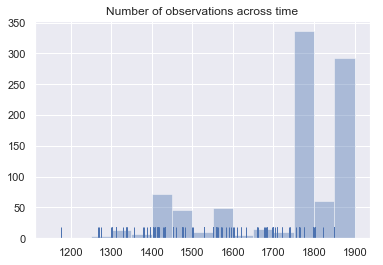

In [3]:
years_bins = list(range(1150,1901,50))

years = [y for c in communes for hy in c["hab_year"] for y in [hy["year"]] if y<=1850]
print("min(years) = ", min(years))

print("Number of observations per year:")
print(pd.Series(years).value_counts())

sns.distplot(years, bins=years_bins, kde=False, rug=True).set_title('Number of observations across time')


Text(0.5, 1.0, 'Number of communes with first observation before year Y')

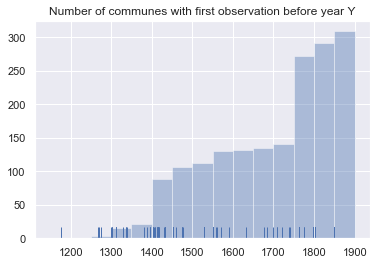

In [4]:


first_years = [min([y for hy in c["hab_year"] for y in [hy["year"]] if y<=1850]+[1850]) for c in communes ]

sns.distplot(first_years, bins=years_bins, hist_kws=dict(cumulative=True),kde=False,rug=True).set_title("Number of communes with first observation before year Y")